In [1]:
from sklearn import cross_validation, datasets, metrics, tree, ensemble, learning_curve

import numpy as np
import pandas as pd

/home/ar600/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
boston = datasets.load_boston()
boston

{'DESCR': "Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  

In [9]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [19]:
n = len(boston.data)
X = boston.data
y = boston.target
X_train=np.array(X[:int(0.75*n)])
X_test=np.array(X[int(0.75*n):])
y_train=np.array(y[:int(0.75*n)])
y_test=np.array(y[int(0.75*n):])


In [30]:
base_algorithms_list = []
coefficients_list = []

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

def L_derivative(y, z):
    return y - z


for i in range(50):    
    if i==0:
        model = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
        model.fit(X_train,y_train)
    
        base_algorithms_list.append(model)
        coefficients_list.append(0.9 / (1.0 + i))
        
        print np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
        continue
    
    b = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    z = gbm_predict(X_train)
    b.fit(X_train, L_derivative(y_train, z))
    
    base_algorithms_list.append(b)
    coefficients_list.append(0.9 / (1.0 + i))
    
    print "%d: error %.2f" % (i, np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test))))
    
    
print "Result:"
answer1 = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
print answer1

with open('gb-ans3.txt', 'w') as f_out:
        f_out.write(str(answer1))

15.8868588294
1: error 4.41
2: error 4.39
3: error 4.46
4: error 4.50
5: error 4.52
6: error 4.55
7: error 4.61
8: error 4.63
9: error 4.65
10: error 4.66
11: error 4.67
12: error 4.69
13: error 4.70
14: error 4.71
15: error 4.73
16: error 4.74
17: error 4.74
18: error 4.75
19: error 4.75
20: error 4.76
21: error 4.76
22: error 4.76
23: error 4.76
24: error 4.76
25: error 4.76
26: error 4.76
27: error 4.77
28: error 4.77
29: error 4.78
30: error 4.78
31: error 4.78
32: error 4.79
33: error 4.79
34: error 4.79
35: error 4.79
36: error 4.79
37: error 4.80
38: error 4.80
39: error 4.80
40: error 4.80
41: error 4.80
42: error 4.80
43: error 4.80
44: error 4.80
45: error 4.80
46: error 4.81
47: error 4.81
48: error 4.81
49: error 4.81
Result:
4.81089328026


In [31]:
import xgboost as xgb

In [39]:
depths = range(3,100,5)
n_trees = range(10,500,40)
ntree_res=[]
for n_tree in n_trees:
    gbm = xgb.XGBRegressor(max_depth=3, n_estimators=n_tree, learning_rate=0.05).fit(X_train, y_train)
    predictions = gbm.predict(X_test)
    ntree_res.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

depth_res=[]
for depth in depths:
    gbm = xgb.XGBRegressor(max_depth=depth, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
    predictions = gbm.predict(X_test)
    depth_res.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

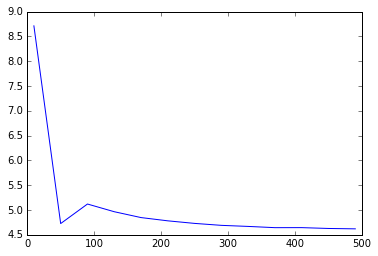

In [40]:
plt.plot(n_trees,ntree_res)

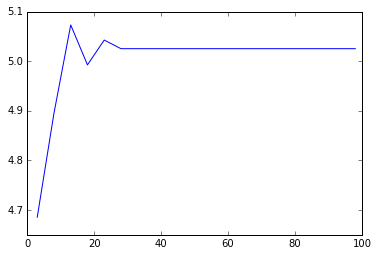

In [41]:
plt.plot(depths,depth_res)

In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

pred = lreg.predict(X_test)

answer5 = np.sqrt(metrics.mean_squared_error(y_test, pred))
print answer5

with open('gb-ans5.txt', 'w') as f_out:
        f_out.write(str(answer5))

8.27046803494
